## 9.1 简明matplotlib API入门

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

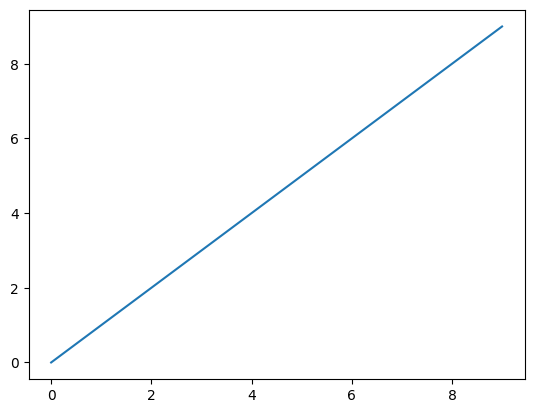

In [4]:
plt.plot(data)

### 9.1.1 图片与子图

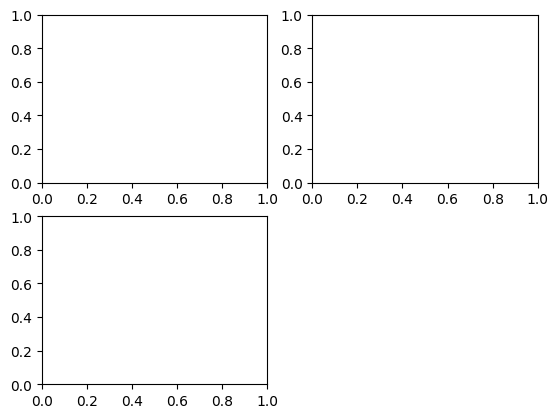

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [6]:
ax3.plot(np.random.standard_normal(50).cumsum(), color='black', linestyle='dashed')

In [7]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [8]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

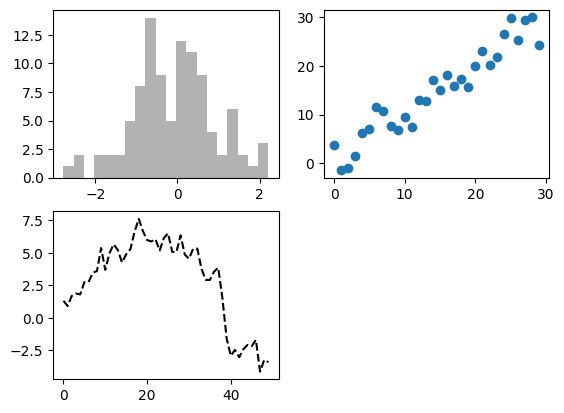

In [9]:
fig

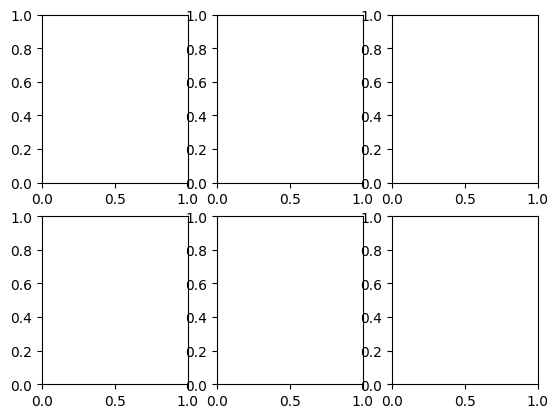

In [10]:
fig, axes = plt.subplots(2, 3)

In [11]:
axes

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

#### 9.1.1.1 调整子图周围的间距

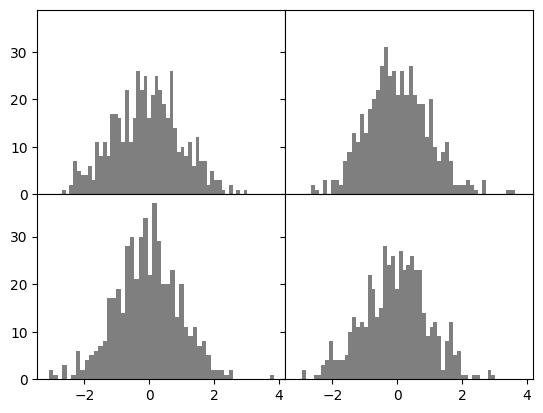

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color='black', alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

### 9.1.2 颜色、标记和线类型

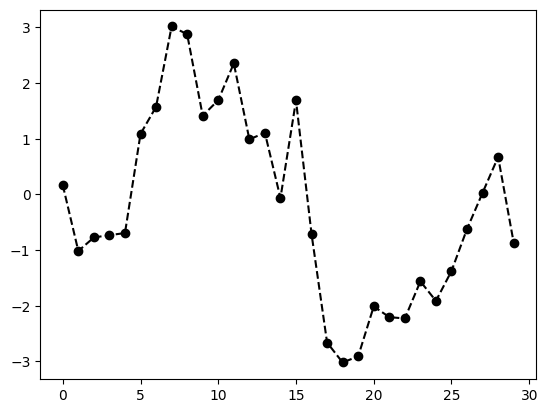

In [13]:
plt.plot(np.random.standard_normal(30).cumsum(), color='black', linestyle='dashed', marker='o')

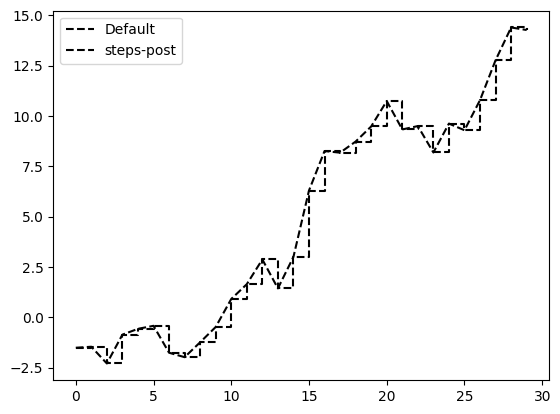

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color='black', linestyle='dashed', label='Default')
ax.plot(data, color='black', linestyle='dashed', drawstyle='steps-post', label='steps-post')
ax.legend()

### 9.1.3 刻度、标签和图例

#### 9.1.3.1 设置标题、轴标签、刻度和刻度标签

Text(0.5, 1.0, 'My first matplotlib plot')

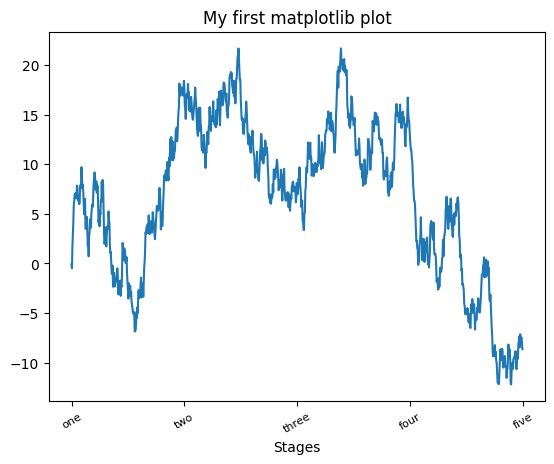

In [21]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

#### 9.1.3.2 添加图例

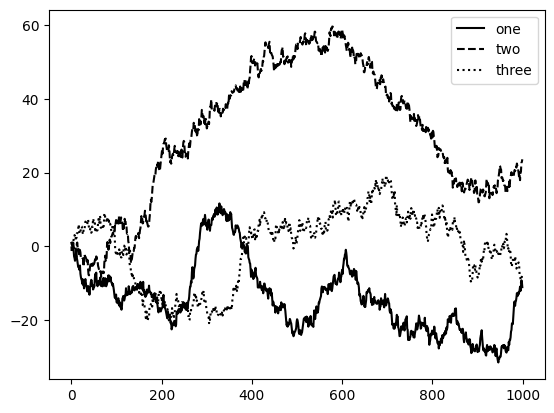

In [25]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color='black', label='one')
ax.plot(np.random.randn(1000).cumsum(), color='black', linestyle='dashed', label='two')
ax.plot(np.random.randn(1000).cumsum(), color='black', linestyle='dotted', label='three')
ax.legend()

### 9.1.4 注释与子图加工

In [26]:
from datetime import datetime

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

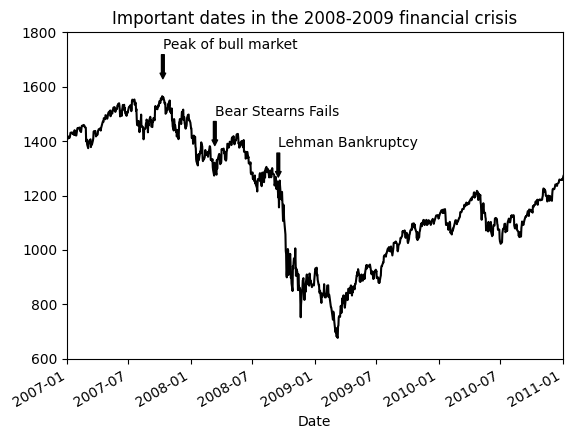

In [27]:
fig, ax = plt.subplots()

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, color='black')

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

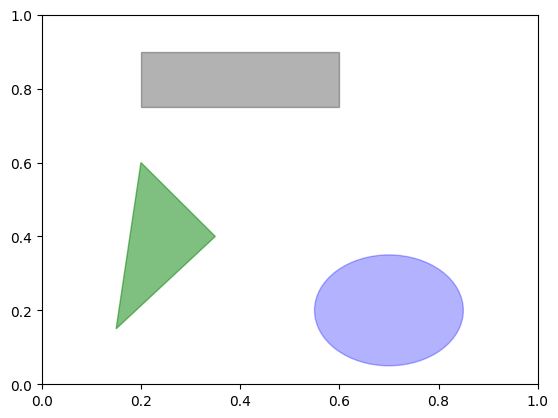

In [28]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='black', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='blue', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='green', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5 将图片保存到文件

In [29]:
# plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

### 9.1.6 matplotlib设置

In [30]:
# plt.rc('figure', figsize=(10, 10))

In [33]:
# plt.rc('font', family='monospace', weight='bold', size=8)

## 9.2 使用pandas和seaborn绘图

### 9.2.1 折线图

<Axes: >

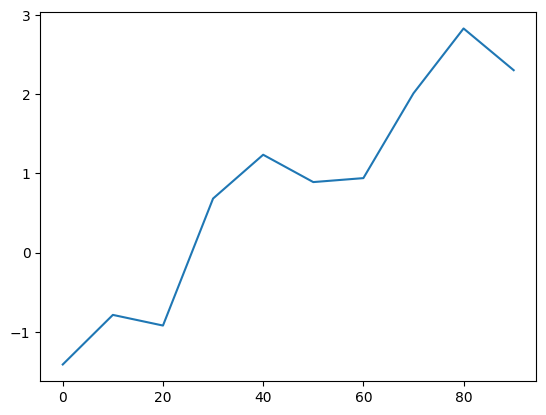

In [34]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

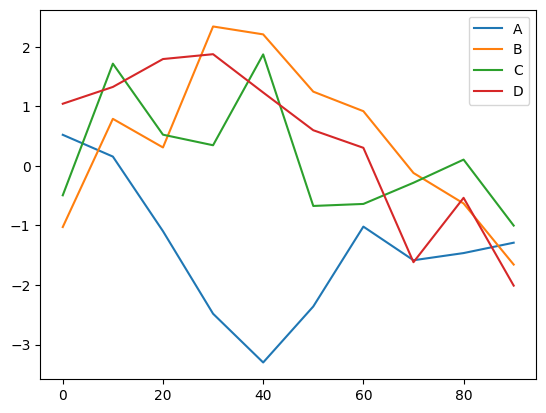

In [35]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### 9.2.2 柱状图

<Axes: >

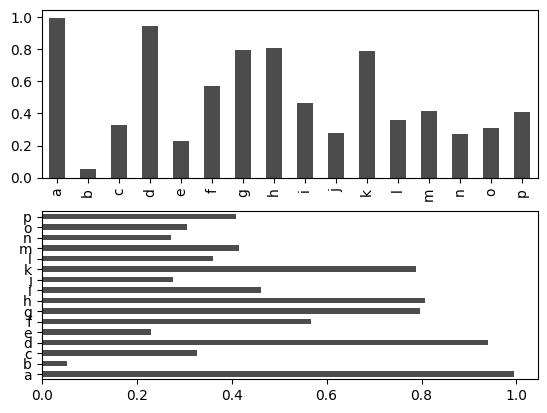

In [3]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7)

data.plot.barh(ax=axes[1], color="black", alpha=0.7)

In [4]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.383674,0.504186,0.387670,0.658461
two,0.010176,0.296683,0.128730,0.302253
three,0.428956,0.491316,0.975521,0.501333
four,0.710431,0.033387,0.210430,0.242269
five,0.250822,0.436810,0.434042,0.514546
six,0.154923,0.307877,0.795064,0.459689


<Axes: >

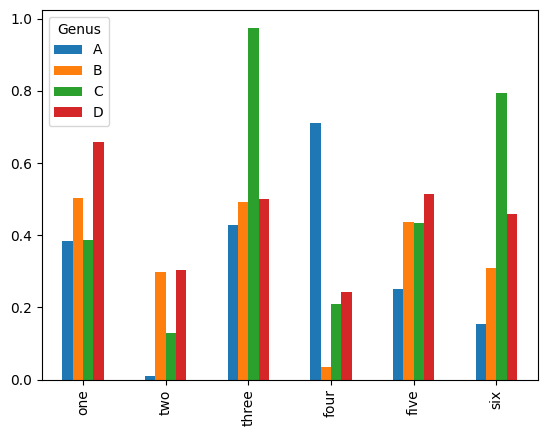

In [6]:
df.plot.bar()

<Axes: >

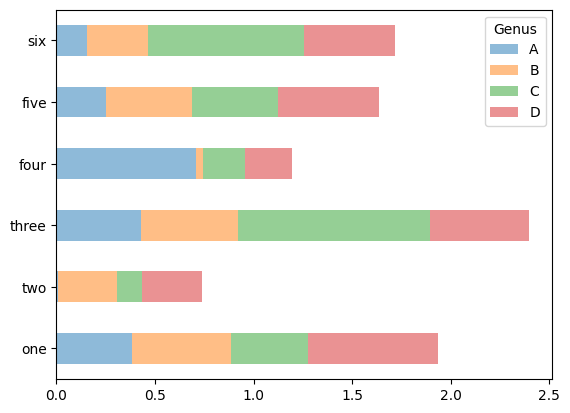

In [7]:
df.plot.barh(stacked=True, alpha=0.5)

In [3]:
tips = pd.read_csv('examples/tips.csv')

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
party_counts = pd.crosstab(tips['day'], tips['size'])

party_counts = party_counts.reindex(index=['Thur', 'Fri', 'Sat', 'Sun'])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [5]:
party_counts = party_counts.loc[:, 2:5]

In [6]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(axis='columns'), axis='index')
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

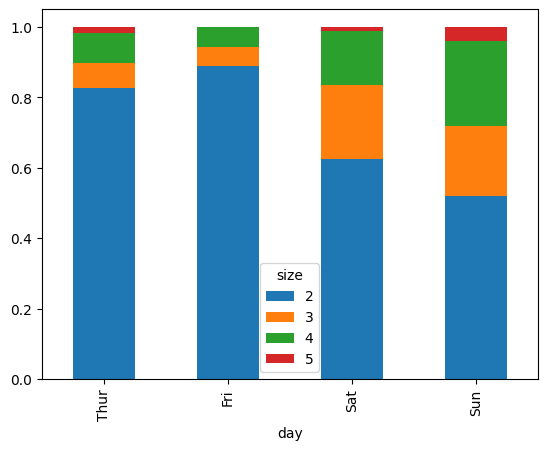

In [7]:
party_pcts.plot.bar(stacked=True)

In [8]:
import seaborn as sns

In [9]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [10]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

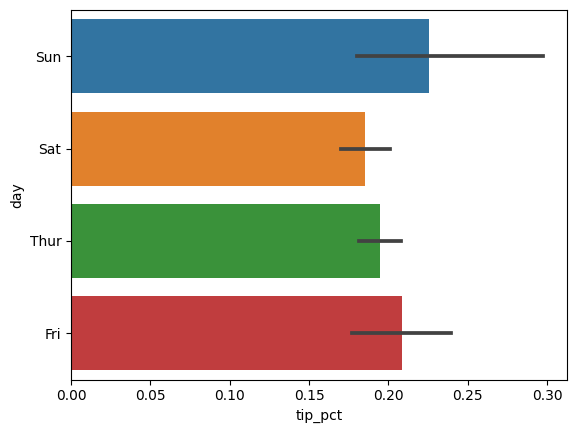

In [12]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<Axes: xlabel='tip_pct', ylabel='day'>

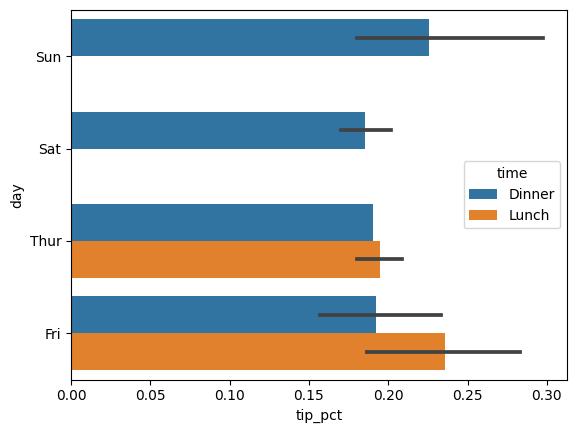

In [13]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [14]:
# sns.set_style('whitegrid')

### 9.2.3 直方图和密度图

<Axes: ylabel='Frequency'>

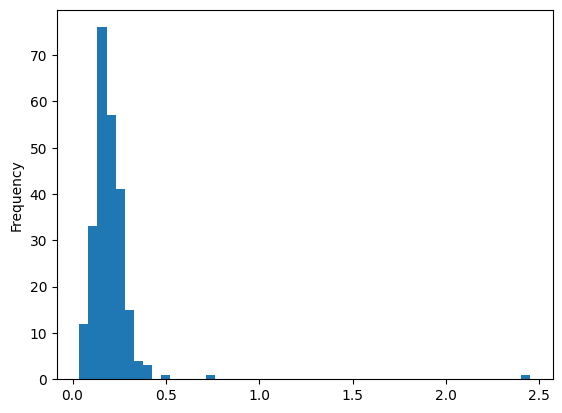

In [15]:
tips['tip_pct'].plot.hist(bins=50)

<Axes: ylabel='Density'>

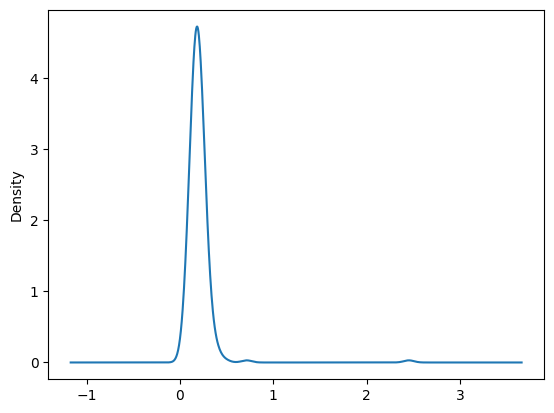

In [17]:
tips['tip_pct'].plot.density()

In [18]:
comp1 = np.random.standard_normal(200)

comp2 = 10 + 2 * np.random.standard_normal(200)

values = pd.Series(np.concatenate([comp1, comp2]))

<Axes: ylabel='Count'>

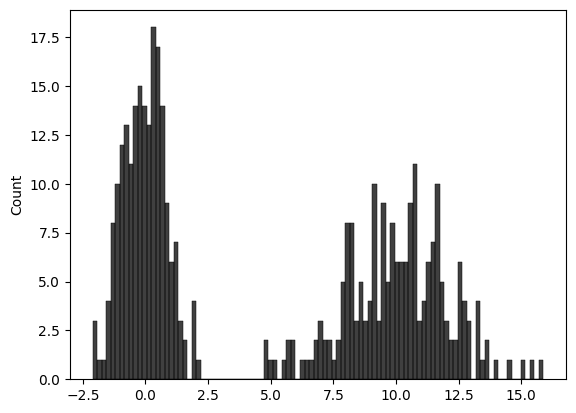

In [19]:
sns.histplot(values, bins=100, color='black')

### 9.2.4 散点图或点图

In [22]:
macro = pd.read_csv('examples/macrodata.csv')

In [23]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [24]:
trans_data = np.log(data).diff().dropna()

In [25]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

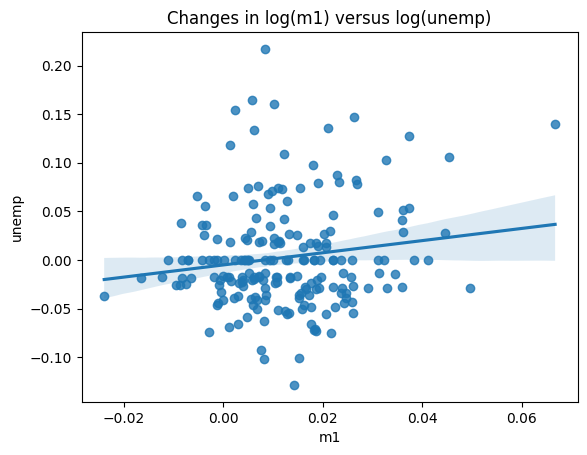

In [26]:
ax = sns.regplot(x='m1', y='unemp', data=trans_data)

ax.set_title("Changes in log(m1) versus log(unemp)")

d:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


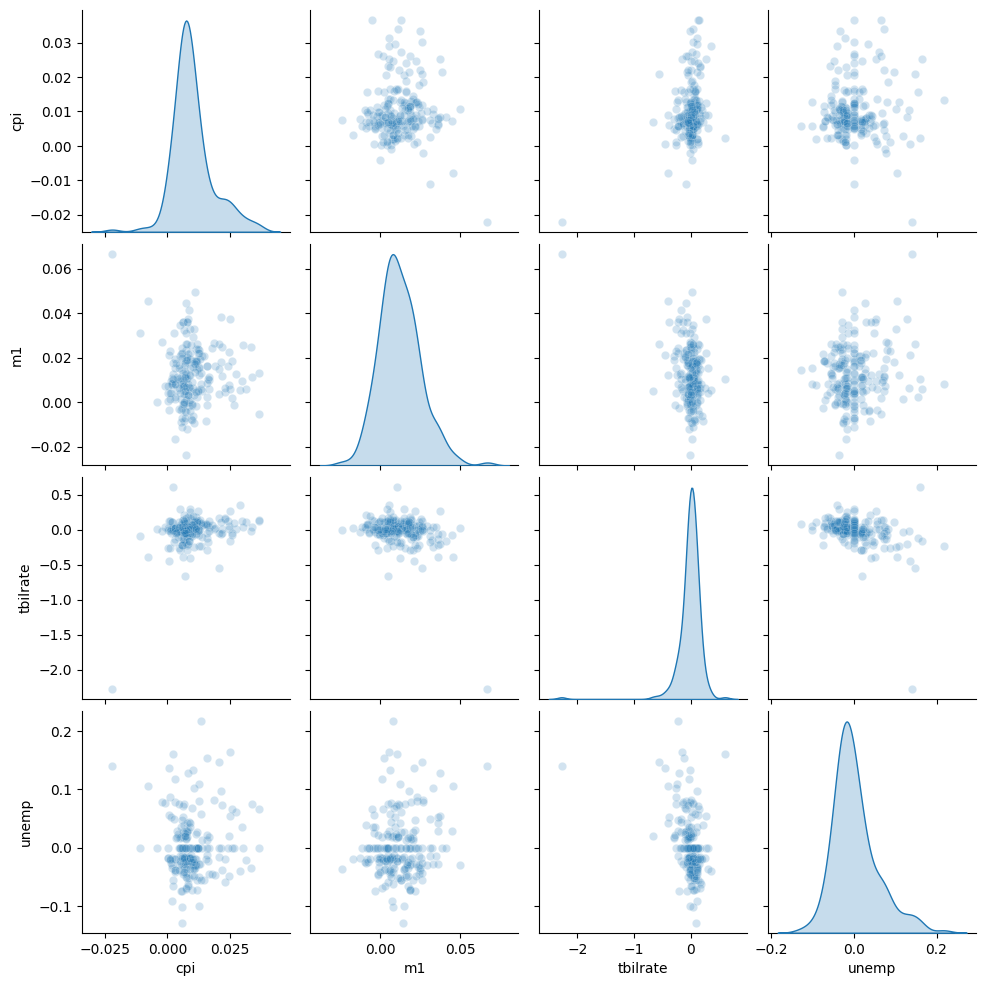

In [27]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### 9.2.5 分面网络和分类数据

d:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


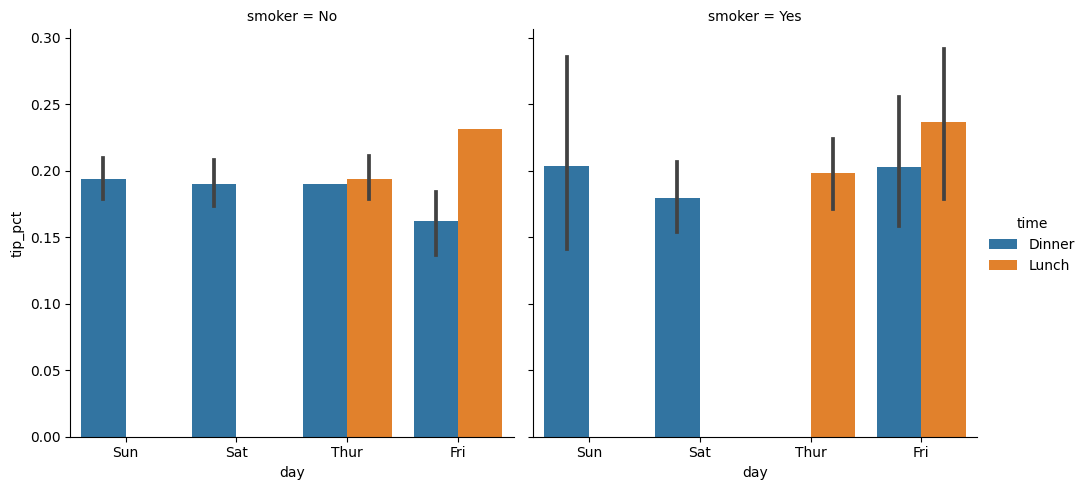

In [29]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
            kind='bar', data=tips[tips.tip_pct < 1])

d:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


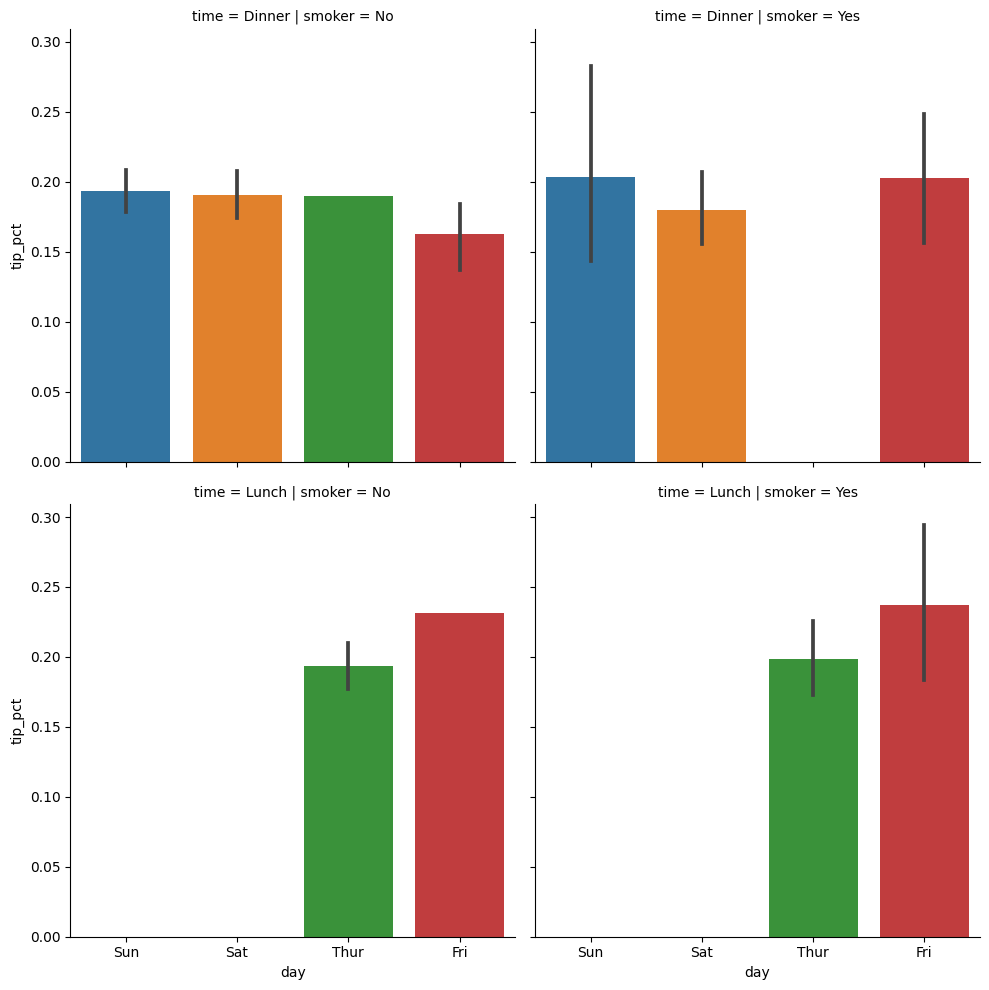

In [30]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker',
            kind='bar', data=tips[tips.tip_pct < 1])

d:\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


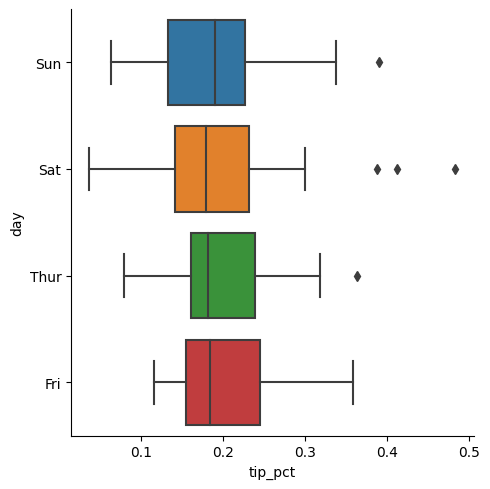

In [31]:
sns.catplot(x='tip_pct', y='day', kind='box',
            data=tips[tips.tip_pct < 0.5])